In [17]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# it contains 28x28 images of hand written numbers from 0-9
# x_train has the training examples that is the input images 
# y_train has the output numbers for those images 0-9


import matplotlib.pyplot as plt
# plt.imshow(x_train[2]) this shows the images in the training set
# print(x_train[0])


# the data is pixel values in gray scale which varies from 0-255, here we need
# to normalize the values, to make them on the same level
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
# plt.imshow(x_train[0])
# print(x_train[0])


# create the model
model = tf.keras.models.Sequential()
# adding the input layer
model.add(tf.keras.layers.Flatten())
# adding hidden layers
# we will choose how many neurons or nodes we want in the hidden layer,
# how many numbers of hidden layers, and activation function for the hidden
# layer
# we will have 2 hidden layers and 128 nodes or neurons in each layer
# we will use ReLU as the activation function for the hidden layers
# this is the most commonly used activation function
# hidden layer 1
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
# hidden layer 2
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
# now we finally add the output layer
# this layer will have nodes equal to the number of classes in the problem
# here we want to identify a number between 0-9 hence
# there are 10 classes so we will have 10 nodes in the output layer
# we will use the softmax function for the output layer for
# probability distribution

model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))


# now we enter more details for the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# now we are done here
# implementing or training
model.fit(x_train,y_train,epochs = 3)









  

Epoch 1/3
60000/60000 [==============================] - 8s 130us/step - loss: 0.2590 - acc: 0.9238
Epoch 2/3
60000/60000 [==============================] - 7s 122us/step - loss: 0.1065 - acc: 0.9669
Epoch 3/3
10000/10000 [==============================] - 0s 36us/step
0.09701569564389065 0.9703


In [18]:
# lets check the model
# testing
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 29us/step
0.09701569564389065 0.9703


In [19]:
# now we will test it visually
# for that
predictions = model.predict([x_test])
print(predictions)

[[6.1970229e-10 7.8130036e-09 6.5607978e-06 ... 9.9998307e-01
  7.6174578e-09 2.4177098e-07]
 [1.0219112e-09 4.3558530e-06 9.9999261e-01 ... 2.2993760e-08
  1.0484100e-06 4.3628141e-13]
 [4.8887091e-07 9.9942565e-01 2.6370899e-05 ... 1.7492153e-04
  2.2664460e-04 6.4696286e-07]
 ...
 [1.8226515e-09 5.6790776e-07 1.0359061e-09 ... 1.1595521e-06
  1.1934333e-05 4.2029872e-04]
 [4.2659199e-06 1.5482425e-06 1.4600677e-06 ... 1.0298732e-05
  3.0908117e-03 2.8036425e-07]
 [2.7701105e-07 4.2514536e-10 1.4928890e-08 ... 1.8001744e-11
  4.4682469e-08 1.1656407e-08]]


In [20]:
# predictios is a matrix
print(predictions[0])
# this is a vector for the first image
# this contains 10 values, these values are probability distributions. 
# first value in the vector tells the probability of image being of 1,
# second value tells the probability of it being 2 and so on
# we need to find the maximum of these value 
# which will be the number our model has highest probability of
# for that lets use numpy


[6.19702289e-10 7.81300358e-09 6.56079783e-06 1.01181722e-05
 1.05582675e-10 3.92186621e-08 6.59792545e-15 9.99983072e-01
 7.61745778e-09 2.41770977e-07]


In [23]:
import numpy as np
print(np.argmax(predictions[0]))
# it says that it is highest probability that it is a seven
# lets see the image

0


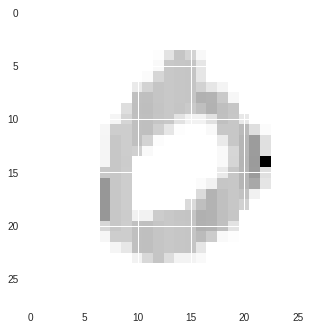

In [24]:
plt.imshow(x_test[0])
plt.show()
# both mathc
# hence pur neural network is actually working